# Analysis of Failed Orders on Gett.

### Importing Necessary Libraries

In [2]:
#!pip install h3 -q

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set_theme()

## Reading The dataset

In [5]:
df_orders=pd.read_csv('datasets\\data_orders.csv')
df_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


After a glance on the given dataset `data_order`, it seems that this dataset contains the information about only the **failed orders**. We observe`order_gk` is the order number, which is a identifier of particular orders and does not have any significance in statistical analysis.

Our main focus is on other variables that will be used for spatial and temporal analysis of the datasets.

In [6]:
df_offers=pd.read_csv('datasets\\data_offers.csv')
df_offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


`data_offers` is a simple map of `order_gk` and `offer_id`. Here, it seems `offer_id` serves as a unique identifier for **each offer made to a driver**. So we can use it for *frequency analysis* or to find *offer acceptance rate*.


## **Preparing The Dataset**


In [7]:
#Convert 'order_datetime' to datetime format
df_orders['order_datetime'] = pd.to_datetime(df_orders['order_datetime'])

df_orders['order_hour'] = df_orders['order_datetime'].dt.hour #extracted 'order_hour' from 'order_datetime'

# Dropped the 'order_datetime'
df_orders = df_orders.drop(columns=['order_datetime'],axis=1)

C:\Users\hasan\AppData\Local\Temp\ipykernel_9988\684218790.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_orders['order_datetime'] = pd.to_datetime(df_orders['order_datetime'])


In [8]:
# Changing variable to categorical form
df_orders['order_hour'] = df_orders['order_hour'].astype('category')
df_orders['is_driver_assigned_key'] = df_orders['is_driver_assigned_key'].astype('category')
df_orders['order_status_key'] = df_orders['order_status_key'].astype('category')

In [9]:
df_orders.head()

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,order_hour
0,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18
1,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,20
2,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12
3,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13
4,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,21


In [10]:
# grouping 'df_offers' on the basis of 'order_gk'
df_offers=df_offers.groupby('order_gk').count().reset_index()
df_offers.head()

,order_gk,offer_id
0,3000551431542,1
1,3000551431560,2
2,3000551431566,5
3,3000551431577,2
4,3000551431592,7


In [11]:
# merging the datasets on the basis of 'order_gk'
order_offer=df_orders.merge(df_offers,how='outer', left_on='order_gk', right_on='order_gk')

In [12]:
order_offer['cancellations_time_in_mins'] = round(order_offer['cancellations_time_in_seconds']/60, 3)
order_offer = order_offer.drop(columns=['cancellations_time_in_seconds'],axis=1)

In [13]:
# the resultant dataset
order_offer.head()

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,order_hour,offer_id,cancellations_time_in_mins
0,-0.996181,51.456698,419.0,3000550131545,4,1,0,NaN,1.867
1,-0.996102,51.456853,60.0,3000550131556,4,1,0,NaN,4.367
2,-0.972272,51.452635,179.0,3000550131647,4,1,0,NaN,3.783
3,-0.973054,51.456748,60.0,3000550131656,4,1,0,NaN,3.333
4,-0.972275,51.452633,238.0,3000550131686,4,1,0,NaN,0.783


In [14]:
order_offer.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,offer_id,cancellations_time_in_mins
count,10716.000000,10716.000000,2814.000000,1.010730e+05,97967.000000,7307.000000
mean,-0.964323,51.450541,441.415423,3.000600e+12,3.413017,2.631539
std,0.022818,0.011984,288.006379,2.453710e+07,2.226526,3.556118
min,-1.066957,51.399323,60.000000,3.000550e+12,1.000000,0.050000
25%,-0.974363,51.444643,233.000000,3.000584e+12,1.000000,0.750000
50%,-0.966386,51.451972,368.500000,3.000595e+12,3.000000,1.633000
75%,-0.949605,51.456725,653.000000,3.000625e+12,5.000000,3.125000
max,-0.867088,51.496169,1559.000000,3.000633e+12,9.000000,71.717000


## Task 1.

### Building the distribution of Failed orders

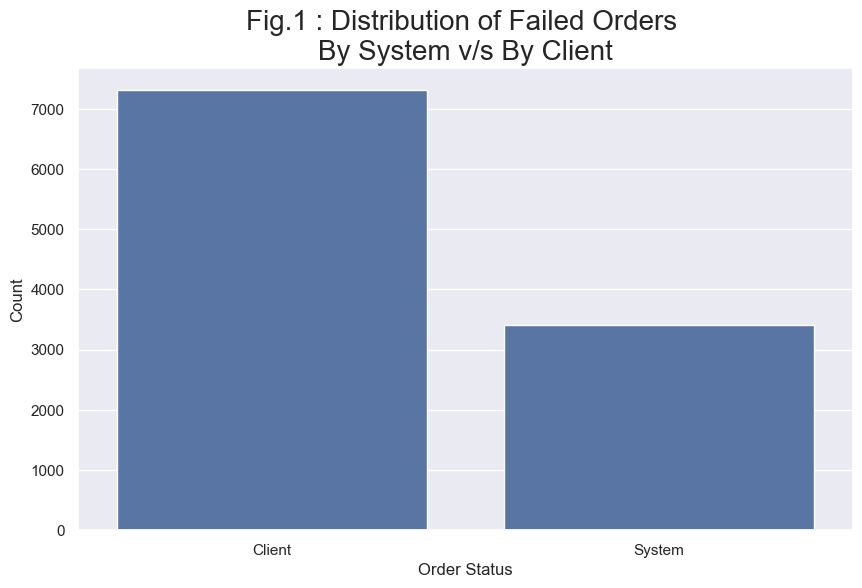

In [15]:
#plot, ax = plt.subplots(1, 2, figsize = (25, 7))
plt.figure(figsize=(10, 6))
sns.barplot(x=order_offer.groupby('order_status_key',observed=False).order_gk.count().index, y=order_offer.groupby('order_status_key',observed=False).order_gk.count().values)
plt.title('Fig.1 : Distribution of Failed Orders \nBy System v/s By Client',fontsize = 20)
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Client', 'System'])
plt.savefig(fname = 'Fig1.jpg')
plt.show()

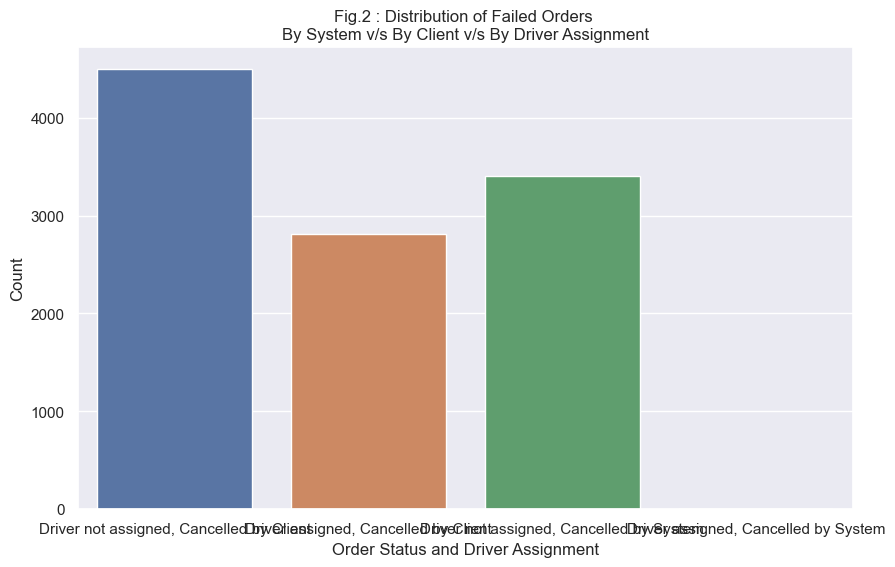

In [23]:
order_offer.groupby(['order_status_key','is_driver_assigned_key'],observed=False).order_gk.count().plot.bar(ax = ax[1])
plt.title('Fig.2 : Distribution of Failed Orders \nBy System v/s By Cliet v/s By Driver Assignment')
plt.xlabel('Order Status')
plt.ylabel('Count')
ax[1].set_xtick(['Driver not assigned,Cancelled by Client',
                       'Driver assigned,Cancelled by Client',
                       'Driver not assigned, Cancelled by System',
                       'Driver assigned,Cancelled by System',])

plt.savefig(fname = 'Fig1.png')
plt.show()

`Figure 2` shows the distribution of order failures based on different cancellation reasons. The x-axis represents the cancellation reasons, and the y-axis represents the count of orders that were canceled for each reason.
Here are the key findings from the graph:

- **Client Cancellation**: The most common reason for order failures is "Client Cancelled," accounting for the highest number of cancellations.

- **Driver Not Assigned**: The second most common reason is "Driver Not Assigned," indicating that there were a significant number of orders that could not be fulfilled due to a lack of available drivers.

- **Cancelled by System**: The remaining cancellations were due to various system-related issues, such as technical glitches or order processing errors.

### Insight

Overall, the graph suggests that a large proportion of order failures are directly related to **client behavior or operational issues**, rather than **systemic problems**. This information can be valuable for identifying areas where improvements can be made to reduce order cancellations and improve customer satisfaction.


In [38]:
order_offer['order_status_key'].value_counts()

10716

In [16]:
order_offer.groupby(['order_status_key','is_driver_assigned_key'],observed=False).order_gk.count()

order_status_key  is_driver_assigned_key
4                 0                         4496
                  1                         2811
9                 0                         3406
                  1                            3
Name: order_gk, dtype: int64

## **Task 2**

### Distribution of Failed orders by **Hours**

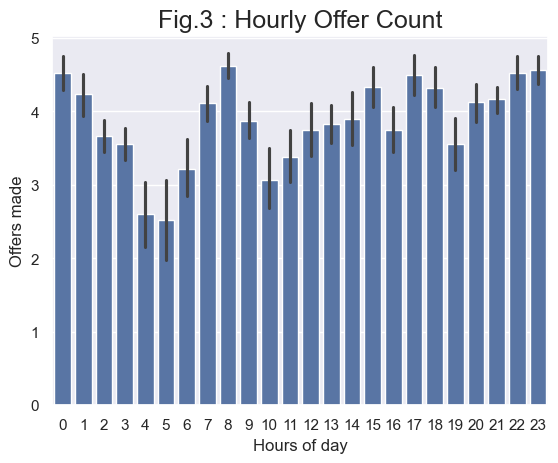

In [18]:
sns.barplot(data=order_offer.sort_values(by='order_hour', ascending=True), x="order_hour", y="offer_id")
plt.xlabel('Hours of day')
plt.ylabel('Offers made')
plt.title('Fig.3 : Hourly Offer Count', fontsize=18)
plt.savefig('fig3.jpg')  # Save as fig3.png
plt.show()

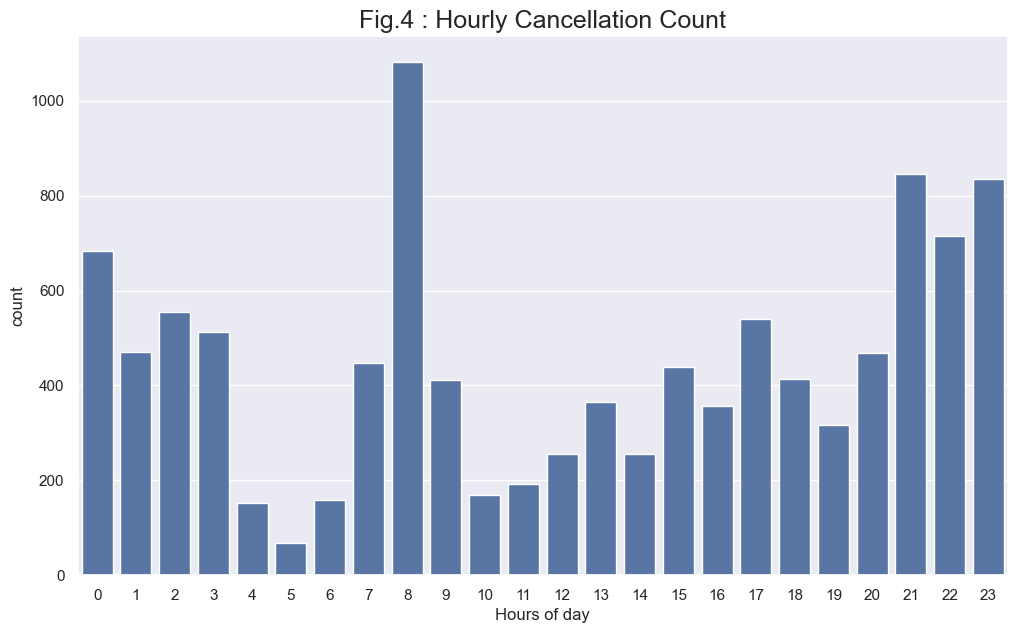

In [19]:
plt.figure(figsize=(12, 7))
sns.countplot(data=order_offer.sort_values(by='order_hour', ascending=True), x="order_hour")
plt.xlabel('Hours of day')
plt.title('Fig.4 : Hourly Cancellation Count', fontsize=18)
plt.savefig('fig4.png')  # Save as fig4.png
plt.show()

`Figure 4` shows the distribution of order cancellations over the course of a day, divided into hourly intervals. The x-axis represents the hour of the day, and the y-axis represents the frequency of cancellations that occurred during that hour.
Here are the key findings from the graph:
- **Peak Cancellation Times**: The graph reveals two distinct peak periods for cancellations:

  - **Morning Rush Hour**: There is a significant spike in cancellations between 7 AM and 10 AM, likely coinciding with the morning rush hour when many people are commuting to work or school.

  - **Evening Peak**: Another peak occurs between 6 PM and 9 PM, which might be attributed to increased dinner orders and evening plans.

- **Consistent Cancellation Rates**: Throughout the rest of the day, the frequency of cancellations remains relatively consistent, with a slight dip during the late afternoon hours.

### Insight

Overall, the graph suggests that a significant portion of order cancellations occur during peak traffic times, indicating that factors such as traffic congestion, driver availability, and increased demand may be contributing to these cancellations. This information can be valuable for identifying strategies to improve order fulfillment during busy periods and reduce customer dissatisfaction.


In [18]:
s = order_offer.groupby('order_hour',observed=False).order_gk.count()
print(f'Maximum value = {s.max()} at hour = {s.idxmax()}')
print(f'Minimum value = {s.min()} at hour = {s.idxmin()}')

Maximum value = 1082 at hour = 8
Minimum value = 67 at hour = 5


## **Task 3.**

### **Plotting average time to cancellation**

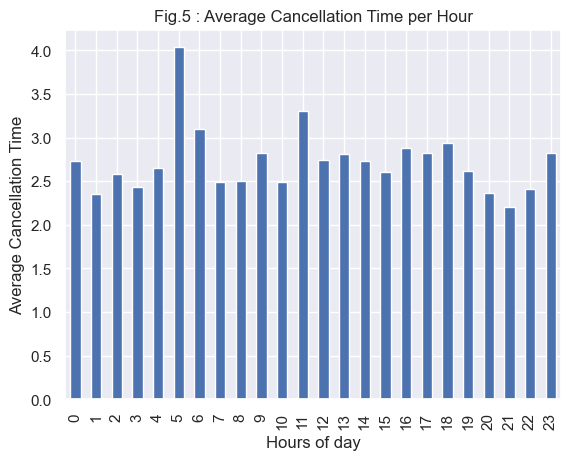

In [25]:
order_offer.groupby('order_hour',observed=False).cancellations_time_in_mins.mean().reset_index().sort_values(by='order_hour',ascending=True).cancellations_time_in_mins.plot(kind='bar',title='Fig.5 : Average Cancellation Time per Hour')
plt.xlabel('Hours of day')
plt.ylabel('Average Cancellation Time')
plt.savefig(fname = "fig5.jpg")
plt.show()

`Figure 5` shows the average cancellation time per hour.

- **Overall Trend**: The average cancellation time seems to fluctuate throughout the day. There is no clear overall trend, but there are some noticeable peaks and valleys.

- **Peak Cancellation Times**: The chart shows peaks in cancellation times around 5 AM, 12 PM, and 7 PM. This suggests that there might be specific factors influencing cancellations during these times, such as traffic congestion, peak business hours, or changes in customer behavior.

- **Variability**: The cancellation times vary across different hours, indicating that factors other than time of day might influence cancellations, such as customer behavior, traffic conditions, or system issues.


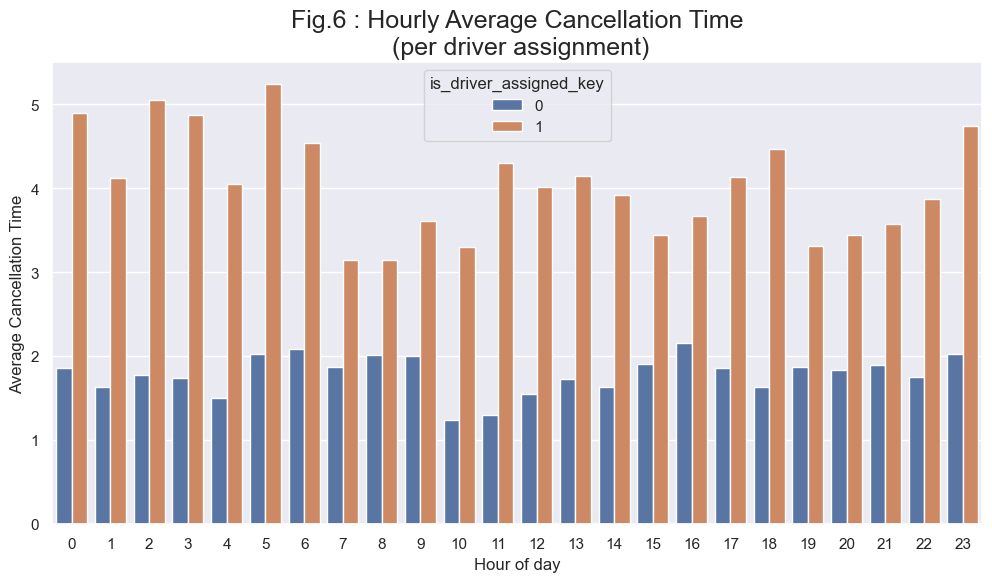

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=order_offer.groupby(['order_hour','is_driver_assigned_key'],observed=False).cancellations_time_in_mins.mean().reset_index(),x='order_hour',y='cancellations_time_in_mins',hue='is_driver_assigned_key')
plt.title('Fig.6 : Hourly Average Cancellation Time\n (per driver assignment)',fontsize=18)
plt.xlabel('Hour of day')
plt.ylabel('Average Cancellation Time')
plt.savefig(fname = "fig6.jpg")
plt.show()

`Figure 6` shows the hourly average cancellation time for orders based on whether a driver was assigned `is_driver_assigned_key`.

- **Overall Trend**: In general, the average cancellation time tends to be higher when a driver is assigned compared to when a driver is not assigned. This suggests that issues related to driver assignments might contribute to longer cancellation times.

- **Peak Cancellation Times**: There seem to be peaks in cancellation times around certain hours. For example, there's a noticeable peak between 10 PM and 1 AM for orders with assigned drivers. Identifying these peak times can help in understanding when operational issues or customer behavior might be leading to longer cancellations.

- **Variability**: The cancellation times vary across different hours, even within the same category of driver assignment. This indicates that other factors besides driver assignment might influence cancellation times, such as customer behavior, traffic conditions, or system issues.


In [47]:
# sns.boxplot(y=order_offer['cancellations_time_in_mins'])
# plt.show()

# grouped = order_offer.groupby(['order_hour', 'is_driver_assigned_key']).agg(
#     mean_cancellations=('cancellations_time_in_mins', 'mean'),
#     count=('cancellations_time_in_mins', 'size')
# ).reset_index()

# # Step 2: Calculate total cancellations time
# grouped['total_cancellations'] = grouped['mean_cancellations'] * grouped['count']

# # Step 3: Calculate overall mean
# overall_mean = grouped['total_cancellations'].sum() / grouped['count'].sum()

# print(f"Overall Mean: {overall_mean}")

mean_cancellations = order_offer.groupby('is_driver_assigned_key')['cancellations_time_in_mins'].mean().reset_index()

print(mean_cancellations)

  is_driver_assigned_key  cancellations_time_in_mins
0                      0                    1.839531
1                      1                    3.898302


C:\Users\hasan\AppData\Local\Temp\ipykernel_9988\194732120.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_cancellations = order_offer.groupby('is_driver_assigned_key')['cancellations_time_in_mins'].mean().reset_index()


- Median: The middle line within the box represents the median value of “cancellations_time_in_mins”. It's approximately around 0. This means that 50% of the cancellations occurred within a very short time, likely less than a second.

- Interquartile Range (IQR): The box itself represents the IQR, which is the range between the first quartile (Q1) and the third quartile (Q3). The length of the box indicates the spread of the middle 50% of the data. In this case, the IQR appears to be relatively small, suggesting that the majority of the cancellations are clustered near 0 minute.

- Minimum and Maximum Values: The whiskers extend from the box to indicate the minimum and maximum values excluding outliers. The minimum value seems to be 0, and the maximum value is around 67 minutes.

- Outliers: The individual points plotted outside the whiskers are potential outliers. These are cancellations that took significantly longer than the rest and may require further investigation.

Distribution Shape:

- Skewness: The box plot is heavily skewed to the right, as the upper whisker is extremely long. This indicates that there are a few cancellations that took a very long time, pulling the distribution to the right.

- Symmetry: The median line is not exactly centered within the box, which suggests a slight asymmetry in the distribution.

Overall Observations:

- The majority of cancellations occur within a very short time, likely less than a second.

- There are a few outliers with cancellations taking significantly longer, which may be worth investigating further.

- The distribution is heavily skewed to the right, indicating a few very long cancellations.


## **Task 4.**

### Plotting average estimated time to arrival by hours.

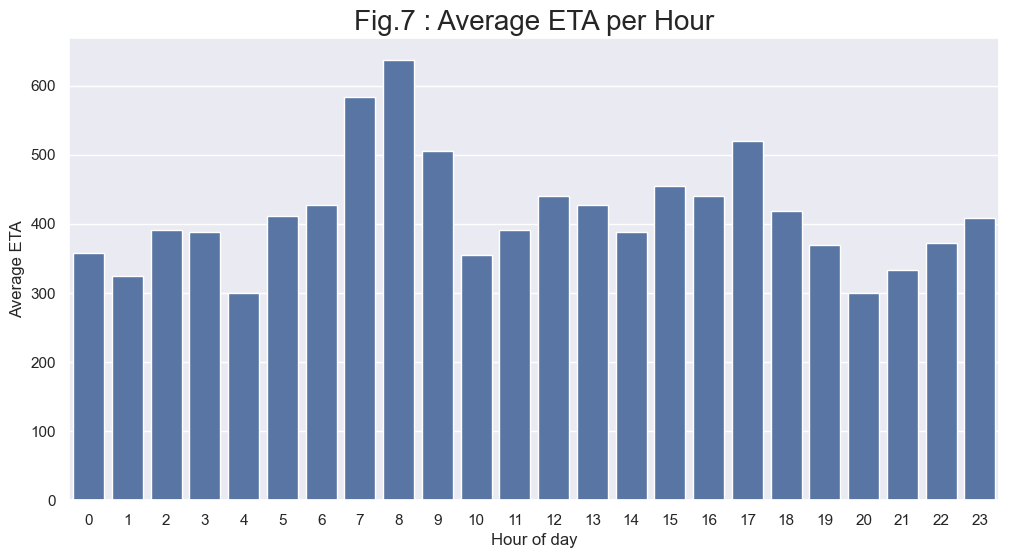

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(data=order_offer.groupby('order_hour',observed=False).m_order_eta.mean().reset_index(), x="order_hour", y="m_order_eta")
plt.title('Fig.7 : Average ETA per Hour',fontsize=20)
plt.xlabel('Hour of day')
plt.ylabel('Average ETA')
plt.savefig('fig7.jpg')
plt.show()

`Figure 7` illustrates the average ETA for orders throughout the day, broken down by hour. The x-axis represents the hour of the day, while the y-axis represents the average ETA in minutes.

- **Overall Trend**: There's a noticeable increase in average ETA during the late evening and early morning hours (around 10 PM to 5 AM). This could be attributed to reduced driver availability or lower traffic volume, leading to longer travel times.

- **Peak Hours**: The highest average ETAs occur between 10 PM and 1 AM, with a slight dip around 12 AM. This suggests that these hours might experience the most significant delays.

- **Daytime Hours**: During daytime hours, the average ETA remains relatively stable with a gradual increase between 8 AM and 6 PM. These fluctuations could be influenced by factors like traffic patterns and varying order volume.

- **Lowest Average ETA**: The lowest average ETA is observed between 6 AM and 7 AM. This might indicate smoother traffic flow or better driver availability during early mornings.

### Insights:

- **Demand and Supply**: The fluctuations in average ETA throughout the day could suggest an imbalance between order demand and driver availability. Longer ETAs during late evenings and early mornings might indicate periods with higher demand or lower driver supply.

- **Operational Efficiency**: Understanding the hourly average ETA can be valuable for optimizing operational strategies. Dispatching more drivers during peak hours or adjusting pricing to balance demand could help improve service efficiency and customer satisfaction.

- **Customer Expectations**: The average ETA should be considered when setting customer expectations regarding delivery times. Providing clear and realistic ETAs can help avoid customer frustration and improve transparency.

## **Task 5.**

### Calculating the number of sizes 8 hexes that contain 80% of all orders.

In [28]:
import h3
import folium


# Define the resolution for the hexagons (size-8 hex)
hex_resolution = 8

# Function to get the hexagon for a given latitude and longitude
def get_hex(lat, lon, resolution):
    return h3.latlng_to_cell(lat, lon, resolution)

# Add a new column with the hexagon for each order
df_orders['hex'] = df_orders.apply(lambda row: get_hex(row['origin_latitude'], row['origin_longitude'], hex_resolution), axis=1)

# Filter for failed orders (order_status_key = 4 for cancelled by client, 9 for cancelled by system)
failed_orders = df_orders[df_orders['order_status_key'].isin([4, 9])]

# Count the number of failed orders per hexagon
hex_fail_count = failed_orders.groupby('hex').size().reset_index(name='fail_count')

# Sort hexagons by the number of failed orders
hex_fail_count = hex_fail_count.sort_values(by='fail_count', ascending=False)

# Calculate the cumulative sum of failed orders
hex_fail_count['cumulative_sum'] = hex_fail_count['fail_count'].cumsum()

# Get the total number of failed orders
total_fails = hex_fail_count['fail_count'].sum()

# Find hexagons that cover 80% of the failed orders
threshold = 0.8 * total_fails
hex_fail_count['cumulative_percentage'] = hex_fail_count['cumulative_sum'] / total_fails

# Select hexagons that cumulatively contain 80% of the failed orders
hex_80_percent = hex_fail_count[hex_fail_count['cumulative_percentage'] <= 0.8]

# Map visualization using folium
# Create a folium map centered on the average coordinates of the orders
map_center = [df_orders['origin_latitude'].mean(), df_orders['origin_longitude'].mean()]
map_fails = folium.Map(location=map_center,tiles = 'cartodb positron', zoom_start=13)

# Function to convert hex to polygon (for visualization)
def hex_to_polygon(hex_id):
    boundary = h3.cell_to_boundary(hex_id)
    return [(lat, lon) for lat, lon in boundary]

# Add hexagons to the folium map, coloring by the number of failed orders
for idx, row in hex_80_percent.iterrows():
    hex_id = row['hex']
    fail_count = row['fail_count']
    hex_polygon = hex_to_polygon(hex_id)

    # Color based on fail count
    color = '#ff0000'

    # Add the hexagon to the map
    folium.Polygon(locations=hex_polygon, color=color, fill=True, fill_opacity=0.6,
                   tooltip=f"Fails: {fail_count}").add_to(map_fails)

map_fails.save("Last.html")
map_fails

In [49]:
# # variable containing failed orders in each hex
# hex_fail_data = hex_fail_count[['hex', 'fail_count']]
# hex_fail_data
hex_80_percent

,hex,fail_count,cumulative_sum,cumulative_percentage
97,88195d2b1dfffff,1497,1497,0.139698
96,88195d2b1bfffff,870,2367,0.220885
93,88195d2b15fffff,774,3141,0.293113
91,88195d2b11fffff,707,3848,0.359089
95,88195d2b19fffff,667,4515,0.421333
20,88195d284dfffff,653,5168,0.482270
63,88195d2a27fffff,414,5582,0.520903
89,88195d2b0bfffff,372,5954,0.555618
62,88195d2a25fffff,362,6316,0.589399
92,88195d2b13fffff,346,6662,0.621687


In [25]:
# number of failed orders in each hex
for index, row in hex_fail_data.iterrows():
    hex_id = row['hex']
    fail_count = row['fail_count']
    print(f"Hexagon: {hex_id}, Failed Orders: {fail_count}")

Hexagon: 88195d2b1dfffff, Failed Orders: 1497
Hexagon: 88195d2b1bfffff, Failed Orders: 870
Hexagon: 88195d2b15fffff, Failed Orders: 774
Hexagon: 88195d2b11fffff, Failed Orders: 707
Hexagon: 88195d2b19fffff, Failed Orders: 667
Hexagon: 88195d284dfffff, Failed Orders: 653
Hexagon: 88195d2a27fffff, Failed Orders: 414
Hexagon: 88195d2b0bfffff, Failed Orders: 372
Hexagon: 88195d2a25fffff, Failed Orders: 362
Hexagon: 88195d2b13fffff, Failed Orders: 346
Hexagon: 88195d2b03fffff, Failed Orders: 257
Hexagon: 88195d2b17fffff, Failed Orders: 210
Hexagon: 88195d2b39fffff, Failed Orders: 184
Hexagon: 88195d2861fffff, Failed Orders: 182
Hexagon: 88195d2a21fffff, Failed Orders: 156
Hexagon: 88195d2b3dfffff, Failed Orders: 153
Hexagon: 88195d2b31fffff, Failed Orders: 143
Hexagon: 88195d2869fffff, Failed Orders: 125
Hexagon: 88195d2b3bfffff, Failed Orders: 115
Hexagon: 88195d2b51fffff, Failed Orders: 98
Hexagon: 88195d2b57fffff, Failed Orders: 92
Hexagon: 88195d2a23fffff, Failed Orders: 91
Hexagon: 881

In [26]:
# Maximum failed order
max_fail_hex = hex_fail_count.loc[hex_fail_count['fail_count'].idxmax(), 'hex']
max_fail_count = hex_fail_count.loc[hex_fail_count['fail_count'].idxmax(), 'fail_count']
print(f"Hexagon with the most failures: {max_fail_hex}, Count: {max_fail_count}")


Hexagon with the most failures: 88195d2b1dfffff, Count: 1497


The most number of failed orders are in the area of the circle where there must be due to traffic congestion and driver inavailability that may result in cancelled orders. This becomes further clearer when we look at the area with least failed orders which quiet distant from urban center.

In [29]:

#

# Define the resolution for the hexagons (size-8 hex)
hex_resolution = 8

# Function to get the hexagon for a given latitude and longitude
def get_hex(lat, lon, resolution):
    return h3.latlng_to_cell(lat, lon, resolution)

# Add a new column with the hexagon for each order
df_orders['hex'] = df_orders.apply(lambda row: get_hex(row['origin_latitude'], row['origin_longitude'], hex_resolution), axis=1)

# Filter for failed orders (order_status_key = 4 for cancelled by client, 9 for cancelled by system)
failed_orders = df_orders[df_orders['order_status_key'].isin([4, 9])]

# Count the number of failed orders per hexagon
hex_fail_count = failed_orders.groupby('hex').size().reset_index(name='fail_count')

# Sort hexagons by the number of failed orders
hex_fail_count = hex_fail_count.sort_values(by='fail_count', ascending=False)

# Calculate the cumulative sum of failed orders
hex_fail_count['cumulative_sum'] = hex_fail_count['fail_count'].cumsum()

# Get the total number of failed orders
total_fails = hex_fail_count['fail_count'].sum()

# Find hexagons that cover 80% of the failed orders
threshold = 0.8 * total_fails
hex_fail_count['cumulative_percentage'] = hex_fail_count['cumulative_sum'] / total_fails

# Select hexagons that cumulatively contain 80% of the failed orders
hex_80_percent = hex_fail_count[hex_fail_count['cumulative_percentage'] <= 0.8]

# Map visualization using folium
# Create a folium map centered on the average coordinates of the orders
map_center = [df_orders['origin_latitude'].mean(), df_orders['origin_longitude'].mean()]
map_fails = folium.Map(location=map_center, tiles='cartodb positron', zoom_start=13)

# Function to convert hex to polygon (for visualization)
def hex_to_polygon(hex_id):
    boundary = h3.cell_to_boundary(hex_id)
    return [(lat, lon) for lat, lon in boundary]

# Add hexagons to the folium map, coloring by the number of failed orders
for idx, row in hex_fail_count.iterrows():
    hex_id = row['hex']
    fail_count = row['fail_count']
    hex_polygon = hex_to_polygon(hex_id)
    # Color based on fail count using a gradient
    color = '#ff0000' if hex_id in hex_80_percent['hex'].values else '#3186cc'
    folium.Polygon(locations=hex_polygon, color=color, fill=True, fill_opacity=0.6,
                   tooltip=f"Fails: {fail_count}").add_to(map_fails)

map_fails.save("map_with_heatmap.html")


In [30]:
map_fails

In [36]:
# import h3
# import folium
# import pandas as pd

# # Load your original data set
# df_orders = pd.read_csv('your_data.csv')

# Define the resolution for the hexagons (size-8 hex)
hex_resolution = 8

# Function to get the hexagon for a given latitude and longitude
def get_hex(lat, lon, resolution):
    return h3.latlng_to_cell(lat, lon, resolution)

# Add a new column with the hexagon for each order
df_orders['hex'] = df_orders.apply(lambda row: get_hex(row['origin_latitude'], row['origin_longitude'], hex_resolution), axis=1)

# Filter for failed orders (order_status_key = 4 for cancelled by client, 9 for cancelled by system)
failed_orders = df_orders[df_orders['order_status_key'].isin([4, 9])]

# Count the number of failed orders per hexagon
hex_fail_count = failed_orders.groupby('hex').agg({'order_status_key': 'size'}).reset_index().rename(columns={'order_status_key': 'fail_count'})

# Sort hexagons by the number of failed orders
hex_fail_count = hex_fail_count.sort_values(by='fail_count', ascending=False)

# Calculate the cumulative sum of failed orders
hex_fail_count['cumulative_sum'] = hex_fail_count['fail_count'].cumsum()

# Get the total number of failed orders
total_fails = hex_fail_count['fail_count'].sum()

# Find hexagons that cover 80% of the failed orders
threshold = 0.8 * total_fails
hex_fail_count['cumulative_percentage'] = hex_fail_count['cumulative_sum'] / total_fails

# Select hexagons that cumulatively contain 80% of the failed orders
hex_80_percent = hex_fail_count[hex_fail_count['cumulative_percentage'] <= 0.8]

# Map visualization using folium
# Create a folium map centered on the average coordinates of the orders
map_center = [df_orders['origin_latitude'].mean(), df_orders['origin_longitude'].mean()]
map_fails = folium.Map(location=map_center, tiles='cartodb positron', zoom_start=13)

# Function to convert hex to polygon (for visualization)
def hex_to_polygon(hex_id):
    boundary = h3.cell_to_boundary(hex_id)
    return [(lat, lon) for lat, lon in boundary]

# Function to get the center of a hex
def hex_center(hex_id):
    return h3.cell_to_latlng(hex_id)

# Add hexagons to the folium map, coloring by the number of failed orders
for idx, row in hex_fail_count.iterrows():
    hex_id = row['hex']
    fail_count = row['fail_count']
    hex_polygon = hex_to_polygon(hex_id)
    center_lat, center_lon = hex_center(hex_id)  # Get the center of the hex
    # Color based on fail count using a gradient
    color = '#ff0000' if hex_id in hex_80_percent['hex'].values else '#3186cc'
    folium.Polygon(locations=hex_polygon, color=color, fill=True, fill_opacity=0.6).add_to(map_fails)
    # Add a marker with the number of fails at the center
    folium.Marker(
        location=[center_lat, center_lon],
        icon=folium.DivIcon(html=f"""<div style="font-size: 12pt; color : black">{fail_count}</div>""")
    ).add_to(map_fails)

map_fails.save("map_with_centered_markers.html")
map_fails

In [48]:
print(order_offer['m_order_eta'].mean())

441.4154228855721
